# Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [101]:
persons = pd.read_csv('https://raw.githubusercontent.com/mbrady4/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-databackedassertions/persons.csv')
persons.head()

(1200, 4)

In [103]:
persons.shape

(1200, 4)

In [104]:
persons.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [108]:
persons.isnull().sum()

Unnamed: 0       0
age              0
weight           0
exercise_time    0
dtype: int64

In [116]:
persons = persons.rename(index=str, columns={'Unnamed: 0':'Index'})
persons.head()

,Index,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [184]:
# Creating Bins
age_bins = pd.cut(persons['age'], 5)
weight_bins = pd.cut(persons['weight'], 5)
exercise_time_bins = pd.cut(persons['exercise_time'], 5)

#Initial Crosstab between age and weight
pd.crosstab(age_bins,weight_bins)

#Initial hypothesis: As people age they tend to gain weight
#Note: Wonder if exercise as decreases with age??

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
age,,,,,
"(17.938, 30.4]",80,86,49,34,7
"(30.4, 42.8]",104,62,49,31,7
"(42.8, 55.2]",78,62,49,26,8
"(55.2, 67.6]",53,71,45,44,9
"(67.6, 80.0]",60,54,66,44,22


In [185]:
#Crosstab between exercise and weight
pd.crosstab(exercise_time_bins, weight_bins)

#hypothesis exercise pretty clearly linked to lower weights. 

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
exercise_time,,,,,
"(-0.3, 60.0]",53,44,61,76,44
"(60.0, 120.0]",65,76,93,73,9
"(120.0, 180.0]",71,67,56,29,0
"(180.0, 240.0]",79,74,38,1,0
"(240.0, 300.0]",107,74,10,0,0


In [219]:
#Crosstab between exercise and weight
pd.crosstab(exercise_time_bins, age_bins)

age,"(17.938, 30.4]","(30.4, 42.8]","(42.8, 55.2]","(55.2, 67.6]","(67.6, 80.0]"
exercise_time,,,,,
"(-0.3, 60.0]",52,52,41,46,87
"(60.0, 120.0]",46,55,42,71,102
"(120.0, 180.0]",54,42,39,40,48
"(180.0, 240.0]",61,47,34,41,9
"(240.0, 300.0]",43,57,67,24,0


In [198]:
#Crosstab with three variables age and exercise on y-axis, and weight on x-axis

person_ct = pd.crosstab([exercise_time_bins,age_bins],weight_bins, 
            rownames=['Exercise Time', 'Age'], 
            colnames=['Weight']
            )
person_ct

Weight                         (99.854, 129.2]  (129.2, 158.4]  \
Exercise Time  Age                                               
(-0.3, 60.0]   (17.938, 30.4]               10               7   
               (30.4, 42.8]                  8              10   
               (42.8, 55.2]                  7               7   
               (55.2, 67.6]                  7               6   
               (67.6, 80.0]                 21              14   
(60.0, 120.0]  (17.938, 30.4]                9              15   
               (30.4, 42.8]                 19               8   
               (42.8, 55.2]                  6               9   
               (55.2, 67.6]                 10              20   
               (67.6, 80.0]                 21              24   
(120.0, 180.0] (17.938, 30.4]               17              20   
               (30.4, 42.8]                 19               8   
               (42.8, 55.2]                  9              13   
               (55.2, 67.6]                 13              14   
               (67.6, 80.0]                 13              12   
(180.0, 240.0] (17.938, 30.4]               19              29   
               (30.4, 42.8]                 25              15   
               (42.8, 55.2]                 18               7   
               (55.2, 67.6]                 12              19   
               (67.6, 80.0]                  5               4   
(240.0, 300.0] (17.938, 30.4]               25              15   
               (30.4, 42.8]                 33              21   
               (42.8, 55.2]                 38              26   
               (55.2, 67.6]                 11              12   

Weight                         (158.4, 187.6]  (187.6, 216.8]  (216.8, 246.0]  
Exercise Time  Age                                                             
(-0.3, 60.0]   (17.938, 30.4]              11              17               7  
               (30.4, 42.8]                10              17               7  
               (42.8, 55.2]                11               9               7  
               (55.2, 67.6]                10              15               8  
               (67.6, 80.0]                19              18              15  
(60.0, 120.0]  (17.938, 30.4]              12              10               0  
               (30.4, 42.8]                16              12               0  
               (42.8, 55.2]                14              12               1  
               (55.2, 67.6]                19              21               1  
               (67.6, 80.0]                32              18               7  
(120.0, 180.0] (17.938, 30.4]              10               7               0  
               (30.4, 42.8]                13               2               0  
               (42.8, 55.2]                12               5               0  
               (55.2, 67.6]                 6               7               0  
               (67.6, 80.0]                15               8               0  
(180.0, 240.0] (17.938, 30.4]              13               0               0  
               (30.4, 42.8]                 7               0               0  
               (42.8, 55.2]                 9               0               0  
               (55.2, 67.6]                 9               1               0  
               (67.6, 80.0]                 0               0               0  
(240.0, 300.0] (17.938, 30.4]               3               0               0  
               (30.4, 42.8]                 3               0               0  
               (42.8, 55.2]                 3               0               0  
               (55.2, 67.6]                 1               0               0

In [187]:
import seaborn as sns

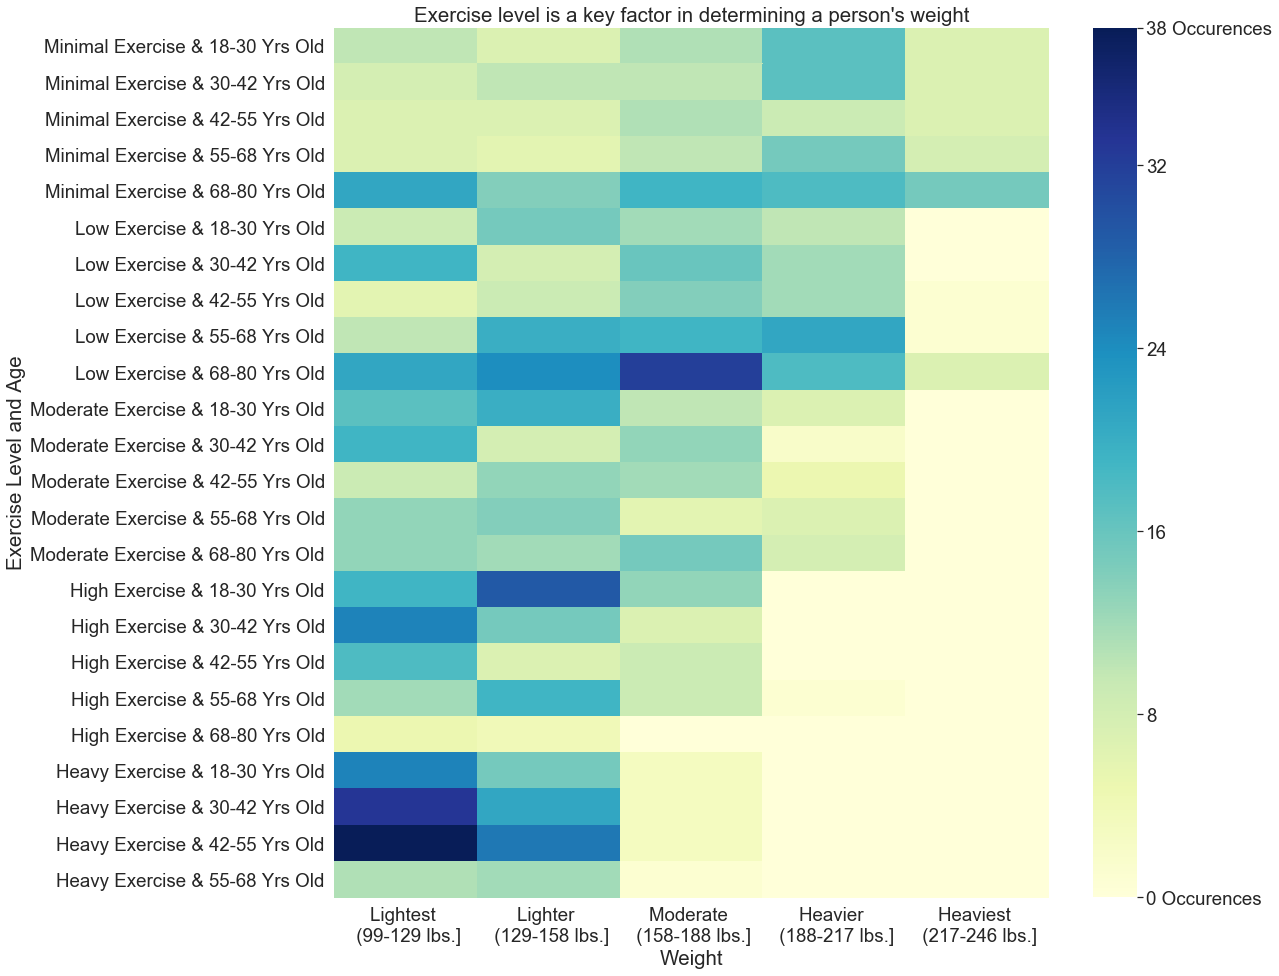

In [218]:
plt.figure(figsize=(16,16))
sns.set(font_scale=1.7)

xticklabels = ['Lightest \n (99-129 lbs.]', 'Lighter \n (129-158 lbs.]','Moderate \n (158-188 lbs.]',
               'Heavier \n (188-217 lbs.]','Heaviest \n (217-246 lbs.]']
yticklabels = ['Minimal Exercise & 18-30 Yrs Old', 'Minimal Exercise & 30-42 Yrs Old',
               'Minimal Exercise & 42-55 Yrs Old','Minimal Exercise & 55-68 Yrs Old', 
               'Minimal Exercise & 68-80 Yrs Old',
               'Low Exercise & 18-30 Yrs Old', 'Low Exercise & 30-42 Yrs Old',
               'Low Exercise & 42-55 Yrs Old','Low Exercise & 55-68 Yrs Old', 'Low Exercise & 68-80 Yrs Old',
               'Moderate Exercise & 18-30 Yrs Old', 'Moderate Exercise & 30-42 Yrs Old',
               'Moderate Exercise & 42-55 Yrs Old','Moderate Exercise & 55-68 Yrs Old', 
               'Moderate Exercise & 68-80 Yrs Old',
               'High Exercise & 18-30 Yrs Old', 'High Exercise & 30-42 Yrs Old',
               'High Exercise & 42-55 Yrs Old','High Exercise & 55-68 Yrs Old', 'High Exercise & 68-80 Yrs Old',
               'Heavy Exercise & 18-30 Yrs Old', 'Heavy Exercise & 30-42 Yrs Old',
               'Heavy Exercise & 42-55 Yrs Old','Heavy Exercise & 55-68 Yrs Old'
              ]

ax = sns.heatmap(person_ct, 
            cmap='YlGnBu', 
            annot=False, 
            cbar=True,
            #cbar_kws={'orientation':'horizontal'},
            xticklabels=xticklabels,
            yticklabels=yticklabels
           )
ax.set(xlabel='Weight',ylabel='Exercise Level and Age', title='Exercise level is a key factor in determining a person\'s weight')
cbar = ax.collections[0].colorbar
cbar.set_ticks([0,8,16,24,32,38])
cbar.set_ticklabels(['0 Occurences', '8', '16', '24', '32', '38 Occurences'])
plt.show()

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
 
    The variables can be broken down as follows: 
        - Dependent Variable: Weight
        - Independent Variable: Weekly Exercise Time
        - Confounding Variable: Age

2.  What are the relationships between the variables?

    The clear relationship as shown in the above heatmap is that a heavy exerciser weigh less than age peers who do exercise less. 


3.  Which relationships are "real", and which spurious?

    The relationship between exercise and weight is very clear, the relationship between age and weight is not clear--without considering additional variables such as weekly exercise time. Thus, the relationship between age and weight could be considered 'spurious'.
